# Chapter 6: Numerical Integration

Goal: given a function f(x), compute $\int_a^bf(x)dx$.

## Introduction


Numerical integration methods approximate integrals by discrete sums:

$$
\int_a^bf(x)dx \approx \sum_{i=0}^nA_if(x_i) = I
$$

The $x_i$ are called *nodal abscissa* and $A_i$ are called *weights*.

This process is also called *quadradure*.



## Newton-Cotes Formulas

The range $[a, b]$ is divided into $n$ **equal** intervals of length h = (b-a)/n.

$f$ is approximated by the polynomial of degree $n$ that interpolates the ($x_i$, $f(x_i)$).

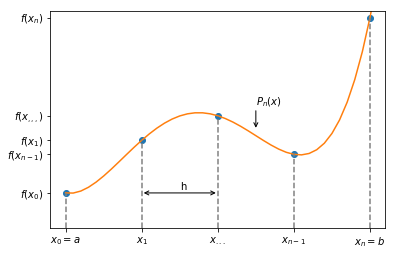

In [120]:
from numpy import arange, array
from matplotlib import pyplot as plt
from scipy.interpolate import lagrange

x = arange(5)
y = array([1, 2.5, 3.2, 2.1, 6])
plt.plot(x, y, 'o')

poly = lagrange(x, y)
xfine = arange(0, 5, 0.1)
yfine = poly(xfine)
plt.plot(xfine, yfine)
plt.annotate("$P_n(x)$", xy=(2.5, 3.5))
plt.annotate(s='', xy=(2.5, 3.4), xytext=(2.5,2.8), arrowprops=dict(arrowstyle='<-'))
for i in range(5):
    plt.plot([x[i], x[i]], [0, y[i]], '--', color='gray')
plt.annotate(s='', xy=(x[1], 1), xytext=(x[2],1), arrowprops=dict(arrowstyle='<->'))
plt.annotate("h", xy=(1.5, 1.1))

xtics = array(["$x_0=a$", "$x_1$", "$x_{...}$", "$x_{n-1}$", "$x_n=b$"])
ytics = array(["$f(x_0)$", "$f(x_1)$", "$f(x_{,,,})$", "$f(x_{n-1})$", "$f(x_n)$"])
plt.xticks(x, xtics)
plt.yticks(y, ytics)
plt.xlim(-0.2,4.2)
plt.ylim(0,6.2)
plt.show()
#plt.xtics(values, xticks)

plt.show()

Using Lagrange's expression:

$$
P_n(x) = \sum_{i=0}^n{f(x_i)l_i(x)}
$$

where:
$$
l_i(x) = \prod_{j=0 \\ j \neq i}^n \frac{(x-x_j)}{x_i-x_j}
$$

Therefore:

$$
I = \sum_{i=0}^n \left(\int_a^bl_i(x)dx\right) f(x_i) \quad \textbf{(1)}
$$

that is:
$$
A_i = \int_a^bl_i(x)dx\quad i=0, 1, \ldots, n \quad \textbf{(2)}
$$

Equations $\textbf{(1)}$ and $\textbf{(2)}$ are called the *Newton-Cotes formulas*. Special cases:
* n=1: Trapezoidal rule
* n=2: Simpson's rule



### Trapezoidal rule

If n = 1, we have: 
$$
l_0(x) = \frac{(x-x_1)}{(x_0-x_1)} \quad \mathrm{and} \quad l_1(x) = \frac{(x-x_0)}{(x_1-x_0)}
$$
and:
$$
x_0 = a \quad \mathrm{and} \quad x_1 = b
$$
which gives:
$$
A_0 = A_1 = \frac{b-a}{2} = \frac{h}{2}
$$

Thus:
$$
I = \frac{h}{2} \left[ f(a) + f(b) \right]
$$
This is called the *Trapezoidal Rule*.

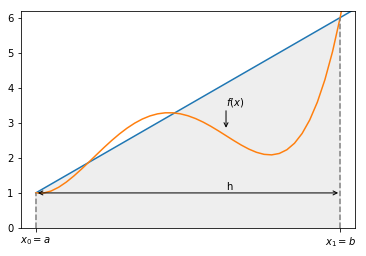

In [112]:
from numpy import arange, array
from matplotlib import pyplot as plt
from scipy.interpolate import lagrange

x = arange(5)
y = array([1, 2.5, 3.2, 2.1, 6])
#plt.plot(x, y, 'o')

line = lagrange([0, 4], [1, 6])
xfine = arange(0, 5, 0.1)
yfine = line(xfine)
plt.plot(xfine, yfine)

poly = lagrange(x, y)
f = poly(xfine)
plt.plot(xfine, f)
plt.annotate("$f(x)$", xy=(2.5, 3.5))
plt.annotate(s='', xy=(2.5, 3.4), xytext=(2.5,2.8), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='', xy=(x[0], 1), xytext=(x[4],1), arrowprops=dict(arrowstyle='<->'))
plt.annotate("h", xy=(2.5, 1.1))
plt.plot([0, 0], [0, y[0]], '--', color='gray')
plt.plot([4, 4], [0, y[4]], '--', color='gray')
area = plt.Polygon([(0,0), (0, y[0]), (4, y[4]), (4,0), (0,0)], closed=True, color='#EEEEEE')
plt.gca().add_patch(area)
xtics = array(["$x_0=a$", "$x_1=b$"])
plt.xticks([0, 4], xtics)
plt.xlim(-0.2,4.2)
plt.ylim(0,6.2)
plt.show()
#plt.xtics(values, xticks)

plt.show()

#### Error

The approximation error is obtained by integrating the interpolation error.

It has the following form:

$$
E = \int_a^b{f(x)dx} - I = -\frac{h^3}{12}f''(\xi)
$$  
Approximation is exact if f is a polynomial of degree 1 or a constant.

#### Example (Trapezoidal rule)

Approximate $\int_0^1x^2dx = 1/3$ using the trapezoidal rule.

### Composite Trapezoidal Rule

In practice the Trapezoidal Rule is applied in a piece-wise way on $n$ panels:
$$
I = \sum_{i=0}^{n-1}I_i \quad \mathrm{and} \quad I_i = \frac{h}{2} \left[ f(x_i) + f(x_{i+1})\right]
$$
It gives:
$$
I = \frac{h}{2}\left[ f(x_0) + 2f(x_1) + 2 f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n) \right] \quad \textbf{(3)}
$$
This is the *composite Trapezoidal Rule*.

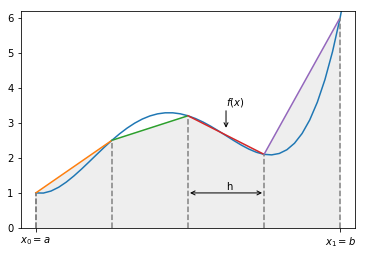

In [119]:
from numpy import arange, array
from matplotlib import pyplot as plt
from scipy.interpolate import lagrange

x = arange(5)
y = array([1, 2.5, 3.2, 2.1, 6])
#plt.plot(x, y, 'o')

xfine = arange(0, 5, 0.1)


poly = lagrange(x, y)
f = poly(xfine)
plt.plot(xfine, f)
plt.annotate("$f(x)$", xy=(2.5, 3.5))

for i in range(4):
    xfine = arange(x[i], x[i+1], 0.01)
    line = lagrange([x[i], x[i+1]], [y[i], y[i+1]])
    yfine = line(xfine)
    plt.plot(xfine, yfine)
    area = plt.Polygon([(x[i],0), (x[i], y[i]), (x[i+1], y[i+1]), (x[i+1],0), (x[i],0)], closed=True, color='#EEEEEE')
    plt.gca().add_patch(area)
    plt.plot([x[i], x[i]],[0, y[i]], '--', color='gray')

plt.annotate(s='', xy=(2.5, 3.4), xytext=(2.5,2.8), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='', xy=(x[2], 1), xytext=(x[3],1), arrowprops=dict(arrowstyle='<->'))
plt.annotate("h", xy=(2.5, 1.1))

plt.plot([0, 0], [0, y[0]], '--', color='gray')
plt.plot([4, 4], [0, y[4]], '--', color='gray')
xtics = array(["$x_0=a$", "$x_1=b$"])
plt.xticks([0, 4], xtics)
plt.xlim(-0.2,4.2)
plt.ylim(0,6.2)
plt.show()
#plt.xtics(values, xticks)

plt.show()

#### Error

The error becomes:

$$
E = - \frac{(b-a)h^2}{12}f''(\xi)
$$

We can reduce the error by reducing h.

#### Example (Composite Trapezoidal Rule)

Approximate $\int_0^1x^2dx = 1/3$ using the composite trapezoidal rule with 3 panels.

#### Implementation

In [121]:
from numpy import arange
def trapezoid(f, a, b, n):
    '''
    Integrates f between a and b using n panels (n+1 points)
    '''
    h = (b-a)/n
    x = a+h*arange(n+1)
    I = f(x[0])/2
    for i in range(1, n):
        I += f(x[i])
    I += f(x[n])/2
    return h*I

In [122]:
def f(x):
    return x**2
trapezoid(f, 0, 1, 3)

0.35185185185185186

### Recursive Trapezoidal Rule

Let $I_k$ the integral evaluated using $2^{k-1}$ panels with the composite trapezoidal rule. Let $H=b-a$.

Equation $\mathrm{\textbf{(3)}}$ gives:
* k=1 (1 panel):
$$
I_1 = \frac{H}{2}\left[ f(a) + f(b) \right]
$$


* k=2 (2 panels):
$$
I_2 = \frac{H}{4} \left[ f(a) + 2f\left(a+\frac{H}{2}\right) + f(b) \right] = \frac{1}{2}I_1 + \frac{H}{2}f\left(a+\frac{H}{2}\right)
$$

* k=3 (4 panels):
$$
I_3 = \frac{H}{8} \left[ f(a) + 2f\left(a+\frac{H}{4}\right) + 2f\left(a+\frac{H}{2}\right) + 2f\left(a+3\frac{H}{4}\right) + f(b)\right] \\
    = \frac{1}{2}I_2 + \frac{H}{4}\left[ f\left( a + \frac{H}{4}\right) + f\left(a+3\frac{H}{4} \right) \right]
$$

* For k > 1 we have the following recurrence:
$$
I_k = \frac{1}{2}I_{k-1} + \frac{H}{2^{k-1}} \sum_{i=1}^{2^{k-2}} f\left( a + \frac{(2i-1)H}{2^{k-1}} \right)
$$

Simpler form to remember:
$$
I(h) = \frac{1}{2}I(2h)+h\sum{f(x_{\mathrm{new}})}
$$
where $h=H/n$ is the width of each panel.

Notes:
* The recursive rule allows to iterate until a desired accuracy $|I_k - I_{k-1}|$ is reached.
* Using the recursive rule doesn't add operations compared to using Equation $\textbf{(3)}$ directly.
    

### Implementation

In [127]:
def trapezoid_rec(f, a, b, tol=10E-12, max_iters=100):
    '''
    Integrates f between a and b using the recursive rule,
    until an accuracy of tol is reached.
    '''
    n = 1
    I = (b-a)/2*(f(a)+f(b)) # trapezoid with 1 panel
    bound = 1
    for k in range(2, max_iters):
        s = 0
        for i in range(1, bound+1):
            s += f(a+((2*i-1)*(b-a))/(2*bound))  # bound is 2**(k-2)
        bound *= 2  # now bound is 2**(k-1)
        J = 1/2*I + (b-a)/bound*s
        if abs(J-I) < tol:
            print("Used {} panels".format(k))
            return J
        I = J
    raise Exception("Did not converge!")

In [128]:
trapezoid_rec(lambda x: x**2, 0, 1)

Used 19 panels


0.33333333333575865

#### Example 6.4

Use the recursive trapezoidal rule to evaluate $\int_0^{\pi}\sqrt{x}\cos(x)dx$ to six decimal places. How many panels were needed to achieve this result?

In [133]:
from math import sqrt, cos, pi
def f(x):
    return sqrt(x)*cos(x)

trapezoid_rec(f, 0, pi, 1E-12)

Used 29 panels


-0.8948314694847712

### Simpson's Rule

Simpson's rule can be obtained from Newton-Cotes formulas with n=2. 

It integrates the parabolic interpolant through three adjacent nodes.

The area under the parabola is given by:
$$
I = \frac{h}{3}\left[ f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right]
$$

The *composite* Simpson's rule is obtained by grouping panels 2 by 2 and computing $I$ on each group of 2 adjacent panels:
$$
I = \sum_{i=0,2,\ldots}^{n-2}{\int_{x_i}^{x_{i+2}}{f(x)dx}}
$$
TYPO IN THE TEXTBOOK

which gives Simpson's 1/3 rule:
$$
I = \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \ldots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n)\right]
$$

#### Error

Error has the following form:
$$
E = \frac{(b-a)h^4}{180}f^{(4)}(\xi)
$$
Rule is exact if $f(x)$ is a polynomial of degree 3 or less. It reduces when h reduces.

#### Example 6.3 (minus one point)

## Gauss-Legendre Quadrature

Gauss-Legendre integration formulas have the same form as Newton-Cotes rules:

$$
I = \sum_{i=0}^nA_if(x_i)
$$

But the $A_i$ and $x_i$ are chosen differently:
1. $x_i$ are usually not evenly-spaced
2. $A_i$ are chosen so that $I$ is the exact integral if $f(x)$ is a polynomial of degree $2n+1$ or less:
$$
\int_a^bf(x)dx = \int_a^bP_m(x)dx = \sum_{i=0}^nA_iP_m(x_i) \quad m \leq 2n+1
$$

For now we assume that a=-1 and b=1.


### n = 1 (Gauss-Legendre quadrature with 2 nodes)

Gauss-Legendre quadrature is written as:
$$
\int_{-1}^1f(x)dx \approx A_0f(x_0) + A_1f(x_1)
$$
$A_0$, $A_1$, $x_0$ and $x_1$ are chosen so that **the quadrature is exact for polynomials of degree 3**:
$$
\int_{-1}^1dx = A_0 + A_1
$$
$$
\int_{-1}^1xdx = A_0x_0 + A_1x_1
$$
$$
\int_{-1}^1x^2dx = A_0x_0^2 + A_1x_1^2
$$
$$
\int_{-1}^1x^3dx = A_0x_0^3 + A_1x_1^3
$$



We obtain:
$$
A_0 = A_1 = 1  \\
x_0 = -x_1 = \frac{1}{\sqrt{3}}
$$

#### Example (2-node Gauss-Legendre)

Use the two-node Gauss-Legendre formula to approximate:
$$
\int_{-1}^1\frac{dx}{x+2} = \ln(3) - \ln(1) \approx 1.09861
$$

### n > 1

The same procedure can be applied with larger values of $n$.

$A_i$ and $x_i$, $i=0,\ldots, n$ ($2n+2$ unknowns) are chosen so that **the quadrature is exact for polynomials of degree $2n+1$** ($2n+2$ equations).

It turns out that:
* the nodes $x_i$ are always arranged symmetrically about 0,
* the weights $A_i$ associated with a symmetric pair of nodes are equal.

We get:

| n | $x_i$ | $A_i$| Error | 
|---|:--------------------------:|------|---|
| 1 | $\pm\frac{1}{\sqrt{3}}$ | 1 | $\frac{f^{(4)}(\xi)}{135}$
| 2 | 0 ; $\pm \sqrt{\frac{3}{5}}$   | $\frac{8}{9}$ ; $\frac{5}{9}$  | $\frac{f^{(6)}(\xi)}{15,750}$
| 3 | $\pm \sqrt{\frac{3}{7}-\frac{2}{7}\sqrt{\frac{6}{5}}} \\ \pm \sqrt{\frac{3}{7}+\frac{2}{7}\sqrt{\frac{6}{5}}}$ | $\frac{18+\sqrt{30}}{36} \\ \frac{18-\sqrt{30}}{36}$ | $\frac{f^{(8)}(\xi)}{3,472,875}$


### Integration on [a, b]

So far we have only integrated on [-1, 1]. Integration on [a, b] is obtained by the following change of variable:

$$
t = \frac{a+b}{2} + \frac{b-a}{2}x
$$

It gives:

$$
\int_{a}^bf(t)dt = \frac{b-a}{2} \int_{-1}^1f\left(\frac{a+b}{2} + \frac{b-a}{2}x\right)dx
$$

#### Example (Gauss-Legendre translation)

Use three-point Gauss-Legendre rule to approximate:
$$
\int_1^5 \frac{dt}{t} = \ln(5) - \ln(1) \approx 1.609
$$

### Other types of Gauss quadratures

The Gauss-Legendre quadrature finds $x_i$ and $A_i$ such that the quadrature is exact for a polynomial of degree $2n+1$. 

Other types of Gauss quadratures find $x_i$ and $A_i$ such that the quadrature is exact for $w(x)P(x)$, where $P$ is a polynomial of degree $2n+1$, that is:

$$
\int_a^bw(x)P(x) = \sum_{i=0}^n A_iP(x_i)
$$

The $A_i$ and $x_i$ are tabulated for following types of Gauss quadratures:

| Name    | w(x) | a | b | 
|---------|------|---|---|
|Legendre | 1    | -1| 1 |
|Chebyshev| $(1-x^2)^{-1/2}$ | -1 | 1 |
|Laguerre | $e^{-x}$ | 0 | $\infty$|
|Hermitte | $e^{-x^2}$ | -$\infty$ | $\infty$|

These types of Gaussian quadratures are associated with *orthogonal polynomials*.

For different w(x) functions, the $x_i$ and $A_i$ can be found as we did for Gauss-Legendre, by solving $2n+2$ non-linear equations.